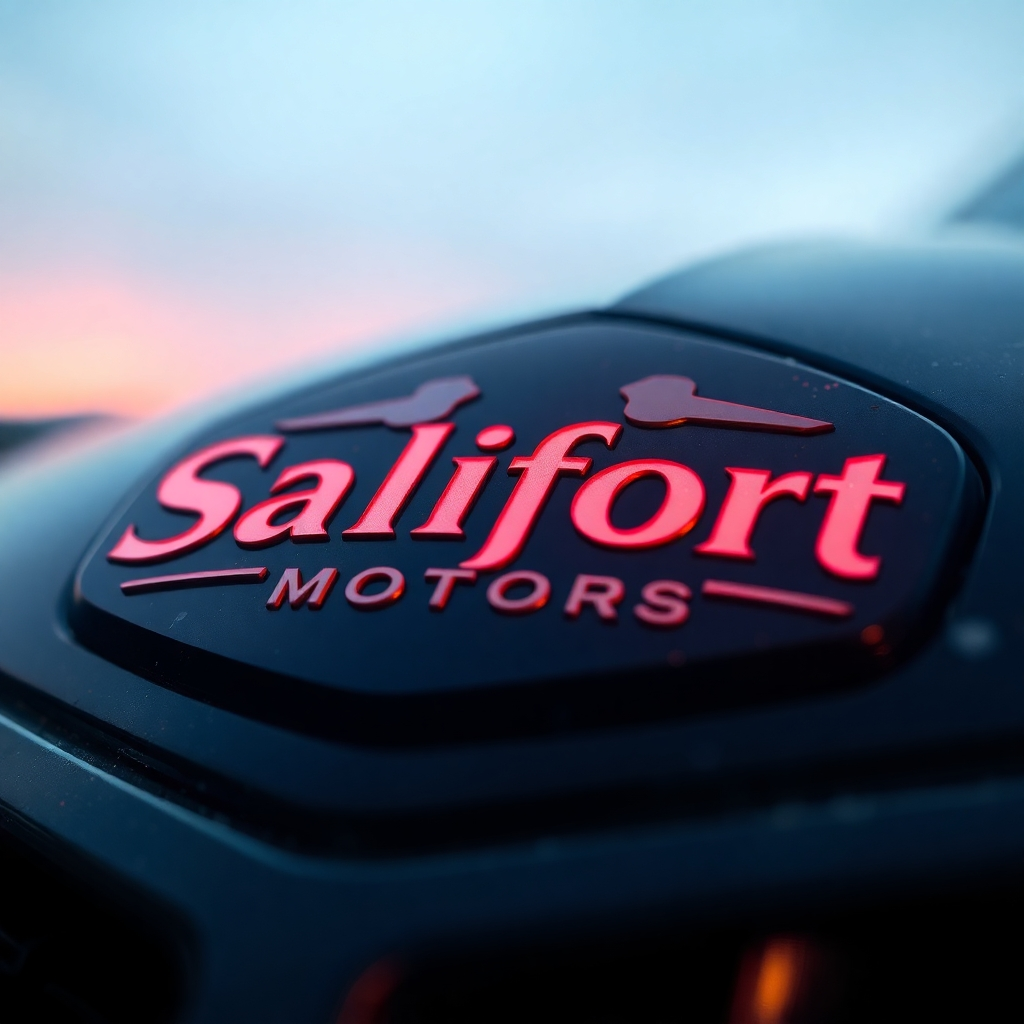

# **Predicting Employee Attrition at Salifort Motors**
## **Data Preparation**

# **Introduction**

This Jupyter Notebook serves as the foundational step in the employee turnover prediction project for Salifort Motors. The goal is to ensure that the dataset is well-structured, clean, and ready for analysis.

**Objectives of This Notebook:**

* **Data Cleaning & Preprocessing** – Handle missing values, remove duplicates, and standardize column formats. Perform minimal feature engineering that applies to all models.  
* **Export Cleaned Dataset** – Save a pre-processed dataset that serves as the foundation for all models, ensuring flexibility for model-specific feature transformations.  

By the end of this notebook, the dataset will be cleaned and prepared for modelling, providing a structured dataset while maintaining adaptability for model-specific transformations.

<br>

## **Business Scenario & Problem**

Salifort Motors is experiencing high employee turnover, leading to increased recruitment costs, operational disruptions, and productivity loss. The HR department has collected survey data from employees and wants to understand why employees leave and how to improve retention.

To address this, Salifort’s leadership has tasked me, their data analytics professional, with uncovering key drivers of turnover. My role is to analyze the survey dataset and develop a predictive model that forecasts which employees are most likely to leave.

By accurately identifying risk factors (such as workload, department, tenure, or salary level), HR can implement targeted retention strategies to enhance employee satisfaction and reduce hiring and training costs.

<br>

## **Data Dictionary**

This [Dataset](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv) Contains:
* **14,999 rows** - each row is a different employee's self-reported information
* **10 columns**
* And the following variables

Variable  |Description |
-----|-----|
`satisfaction_level`|Employee-reported job satisfaction level [0&ndash;1]|
`last_evaluation`|Score of employee's last performance review [0&ndash;1]|
`number_project`|Number of projects employee contributes to|
`average_monthly_hours`|Average number of hours employee worked per month|
`time_spend_company`|How long the employee has been with the company (years)
`Work_accident`|Whether or not the employee experienced an accident while at work
`left`|Whether or not the employee left the company
`promotion_last_5years`|Whether or not the employee was promoted in the last 5 years
`Department`|The employee's department
`salary`|The employee's salary (U.S. dollars)

## **Contents**

#### **Setup and Data Initionalization**
1️⃣ Import Libraries and Packages  
2️⃣ Import Dataset  

#### **Data Validation, Cleaning, and Pre-Model Preparation**
3️⃣ Data Validation  
4️⃣ Data Cleaning  
5️⃣ Feature Engineering  
6️⃣ Export Cleaned and Encoded Datasets  

<br>

# **Setup and Initionalization**
## **1️⃣ Import Libraries and Packages**

**Import** necessary libraries for data manipulation, visualization, and modelling.

In [20]:
# Import packages for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

<br>

## **2️⃣ Import Dataset**

**Load** the dataset into a DataFrame for exploration and analysis.

In [21]:
# Read in dataset
data = pd.read_csv(r'C:\Users\danet\Documents\HR_capstone_dataset.csv')

<br>

# **Data Validation, Cleaning, and Pre-Model Preparation**
## **3️⃣ Data Validation**

**Inspect** first five rows

In [22]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


<br>

**View** basic information about the data

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


***Note:*** Some column names contain inconsistent capitalization (e.g., *"Work_accident"*, *"Department"*). These will be standardized to snake_case for consistency.


In [24]:
# convert column names to snakecase
data.columns = data.columns.str.lower().str.replace(" ", "_")
data.rename(columns={'time_spend_company': 'company_tenure',
                     'average_montly_hours': 'average_monthly_hours'}, inplace=True)
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'company_tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

<br>

**Generate** descriptive statistics

In [25]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,company_tenure,work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


<br>

**Inspect** unique departments and salary types

In [26]:
data['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [27]:
data['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

<br>

## **4️⃣ Data Cleaning**
**Ensure** data quality by addressing missing values, duplicates, and outliers.

#### **Check for and Handle Missing Values** 


In [28]:
# Check for missing values
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
company_tenure           0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

***Note:*** There are no missing values

<br>

#### **Check for and Handle Duplicates**

In [29]:
# Check for duplicates
data.duplicated().sum()

np.int64(3008)

***Note:*** **3,008** duplicate rows have been identified. Further inspection will be conducted to determine their nature and assess the appropriate course of action.

<br>

In [30]:
# Inspect duplicates further
duplicate_count = data.duplicated().sum()
print(f"Total duplicate rows: {duplicate_count}")

duplicates = data[data.duplicated(keep=False)]
duplicates_sorted = duplicates.sort_values(by=duplicates.columns.tolist())
print(f"Unique Duplicated Records: {data.loc[data.duplicated(), :].drop_duplicates().shape[0]}\n")

duplicates_sorted.head(5)

Total duplicate rows: 3008
Unique Duplicated Records: 2338



,satisfaction_level,last_evaluation,number_project,average_monthly_hours,company_tenure,work_accident,left,promotion_last_5years,department,salary
30,0.09,0.62,6,294,4,0,1,0,accounting,low
12030,0.09,0.62,6,294,4,0,1,0,accounting,low
14241,0.09,0.62,6,294,4,0,1,0,accounting,low
71,0.09,0.77,5,275,4,0,1,0,product_mng,medium
12071,0.09,0.77,5,275,4,0,1,0,product_mng,medium


***Notes:*** 
* There are **3,008** duplicate entries however, these duplicates originate from **2,338** unique records, indicating that some rows are repeated multiple times.

* Given the presence of multiple continuous variables across 10 columns, the likelihood of two employees providing identical responses is low, making it reasonable to remove these duplicates.

In [31]:
# Drop duplicates
data_cleaned = data.drop_duplicates(keep='first')

# Confirm changes
print(f"Remaining Rows: {data_cleaned.shape[0]}")
print(f"Duplicate Rows: {data_cleaned.duplicated().sum()}")
print(f"Data Removed: {((data.shape[0] - data_cleaned.shape[0]) / data.shape[0]) * 100:.2f}%")

Remaining Rows: 11991
Duplicate Rows: 0
Data Removed: 20.05%


***Note:*** All duplicates have been removed resulting in a **20.05%** loss in data.

<br>

#### **Check for and Handle Outliers**

In [33]:
# Using a loop to identify outliers and determine the proportion
column_list = ['satisfaction_level',
              'last_evaluation',
              'number_project',
              'average_monthly_hours',
              'company_tenure'
              ]

results = []

for column in column_list:
    q1 = data_cleaned[column].quantile(0.25)
    q3 = data_cleaned[column].quantile(0.75)
    iqr = q3 - q1
      
    # Standard threshold using Q3 + 1.5*IQR
    standard_threshold = q3 + 1.5 * iqr
    standard_outliers = (data_cleaned[column] > standard_threshold).sum()
    proportion = (standard_outliers / len(data_cleaned)) * 100
    
    results.append([
        column, 
        standard_outliers, 
        f"{proportion:.2f}%"
    ])

# Create a DataFrame to display the results
outlier_df = pd.DataFrame(results, columns=[
    'Column', 
    'Number of Outliers', 
    'Proportion'
])

outlier_df

,Column,Number of Outliers,Proportion
0,satisfaction_level,0,0.00%
1,last_evaluation,0,0.00%
2,number_project,0,0.00%
3,average_monthly_hours,0,0.00%
4,company_tenure,824,6.87%


***Note:*** There are two columns containing outliers - `'company_tenure'` and `'promotion_last_5years'`.  I will inspect further using boxplots and histograms.

<br>

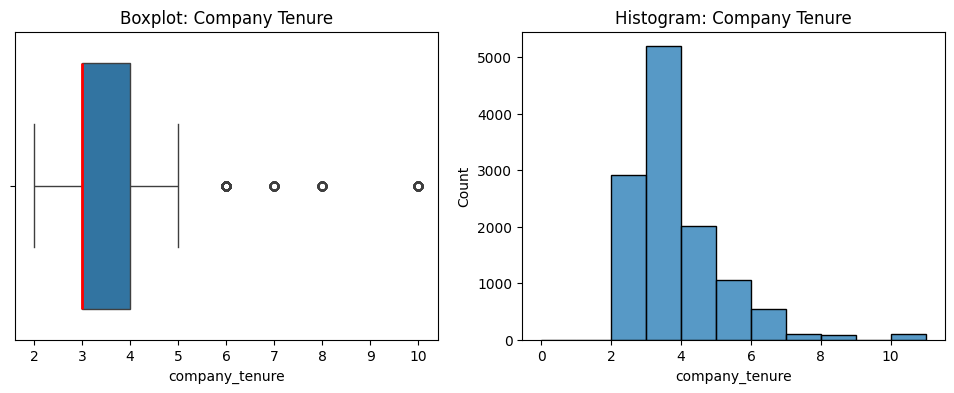

In [34]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Boxplot for 'company_tenure' on the first subplot
sns.boxplot(
    x=data_cleaned['company_tenure'],
    ax=axes[0],
    medianprops={'color': 'red', 'linewidth': 2}  # Highlighting median in red
)
axes[0].set_title('Boxplot: Company Tenure')

# Histogram for 'fare' on the second subplot
sns.histplot(data_cleaned['company_tenure'], bins=range(0, 12, 1), ax=axes[1])
axes[1].set_title('Histogram: Company Tenure');

🔍 ***Key Insights:***  

**Boxplot**  
* The most frequent tenure is around **3-4 years**.
* A small percentage **(6.87%)** of employees have a tenure exceeding **5 years**, indicating that a subset of employees remain with the company significantly longer than the majority.
* The median (center line inside the box) appears to be at **3 years**, showing the central tendency.

**Histogram**  
* The histogram confirms that most employees have a tenure of **3 years**, as seen from the peak in this range.
* The frequency drops sharply beyond **3 years**, supporting the boxplot’s indication of outliers.
* The presence of a long tail on the right (i.e., some employees have tenure up to **10 years**) suggests that while most employees leave within a few years, a few stay much longer.

***Note:*** Some models like logistic regression are more sensitive to outliers, while tree-basd models are more robst to ouliers. When building our models, I will consider whether removing outliers is necessary based on the model type chosen.

<br>

## **5️⃣ Feature Engineering**

Since this dataset relates to employee attrition, I will explore feature engineering techniques that enhance predictive power and capture meaningful relationships between variables. In this notebook, I will only perform categorical encoding, as it is a necessary preprocessing step for all models. The creation of interaction features and feature scaling will be conducted in their respective modeling notebooks to ensure flexibility and prevent unnecessary transformations for models that do not require them.

1. **Categorical Encoding (Performed in This Notebook)**  
* One-Hot Encode `'department'` → Since it's nominal, converting it into binary columns ensures models don't assume an order.
* Label Encode `'salary'` → It's ordinal (low < medium < high), so label encoding preserves the ranking.  

2. **Creating Interaction Features (Performed in Modeling Notebooks)**  
These features capture relationships between existing variables, which may improve prediction accuracy.

* **Workload Indicator:**  
    * Create a feature that combines `'number_project'` and `'average_monthly_hours'` to quantify workload intensity.
    * ***Formula:*** `'workload_intensity'` = number_project * average_monthly_hours  
* **Tenure & Promotion Interaction:**  
    * If someone has been at the company a long time but hasn't been promoted (`'promotion_last_5years'` = 0), that could indicate dissatisfaction.
    * ***Formula:*** `'long_tenure_no_promotion'` = (`'company_tenure'` > X) & (`'promotion_last_5years'` == 0)  
* **Recent Performance & Workload Balance:**  
    * This assesses how well employees perform given their workload.
    * ***Formula:*** `'efficiency_score'` = `'last_evaluation'` / `'average_monthly_hours'`

3. **Feature Scaling (for Logistic Regression, Performed in Modeling Notebooks)**  
* Standardize features to ensure numerical stability.
* StandardScaler (or MinMaxScaler) is quick and helps with model convergence.
* Tree-based models (Decision Tree, Random Forest) don’t need scaling.

<br>

**Encode** categorical variables.

In [35]:
# reassess data types of each column
data_cleaned[['department', 'salary']].dtypes

department    object
salary        object
dtype: object

In [36]:
# Copy the cleaned dataset
data_encoded = data_cleaned.copy()

# Encode the 'salary' column as an ordinal numeric category
data_encoded['salary'] = (
    data_encoded['salary']
    .astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

# One-Hot Encode 'department' column
data_encoded = pd.get_dummies(data_encoded, 
                              columns=['department'], 
                              dtype=int, 
                              drop_first=True)

# Check the data types to verify correctness
data_encoded.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,company_tenure,work_accident,left,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,1,0,0


<br>

## **6️⃣ Export Cleaned and Encoded Datasets**

In [39]:
# Export the encoded dataset
data_cleaned.to_csv("HR_capstone_dataset_cleaned.csv", index=False)
data_encoded.to_csv("HR_capstone_dataset_modelling.csv", index=False)

print("Datasets successfully exported as 'HR_capstone_dataset_cleaned.csv' and 'HR_capstone_dataset_modelling.csv'")

Datasets successfully exported as 'HR_capstone_dataset_cleaned.csv' and 'HR_capstone_dataset_modelling.csv'
